In [82]:
import pandas as pd
df=pd.read_csv("churn_train.csv")
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0


In [83]:
#As can be seen there is a huge number of null values in the column: avg_rating_of_driver
df.isnull().sum() * 100 / len(df)

avg_dist                   0.0000
avg_rating_by_driver       0.4050
avg_rating_of_driver      16.3200
avg_surge                  0.0000
city                       0.0000
last_trip_date             0.0000
phone                      0.7975
signup_date                0.0000
surge_pct                  0.0000
trips_in_first_30_days     0.0000
luxury_car_user            0.0000
weekday_pct                0.0000
dtype: float64

In [6]:
#Let's visualize and see how the variables are related

#The data was pulled on July 1, 2014 and we have to consider 30 days prior to July 1 inorder to form our target variable
# In other words, a user is "active" if they have taken a trip since June 1, 2014.

df['last_trip_date'].unique()
 

array(['2014-05-03', '2014-01-26', '2014-05-21', '2014-01-10',
       '2014-05-13', '2014-04-22', '2014-04-21', '2014-01-12',
       '2014-01-30', '2014-01-29', '2014-01-19', '2014-05-12',
       '2014-06-28', '2014-01-16', '2014-05-30', '2014-05-15',
       '2014-04-13', '2014-03-06', '2014-01-15', '2014-02-17',
       '2014-06-09', '2014-05-23', '2014-06-14', '2014-03-30',
       '2014-06-26', '2014-06-22', '2014-06-01', '2014-06-29',
       '2014-06-19', '2014-06-10', '2014-05-29', '2014-01-25',
       '2014-01-03', '2014-06-21', '2014-03-02', '2014-01-21',
       '2014-06-07', '2014-02-23', '2014-05-01', '2014-06-12',
       '2014-03-08', '2014-04-10', '2014-03-10', '2014-05-25',
       '2014-04-27', '2014-05-05', '2014-01-27', '2014-06-30',
       '2014-06-27', '2014-03-18', '2014-01-13', '2014-05-18',
       '2014-05-31', '2014-05-08', '2014-05-19', '2014-05-17',
       '2014-02-09', '2014-04-06', '2014-05-04', '2014-06-08',
       '2014-06-13', '2014-04-12', '2014-02-07', '2014-

In [7]:
df['signup_date'].unique()

array(['2014-01-12', '2014-01-25', '2014-01-02', '2014-01-09',
       '2014-01-31', '2014-01-29', '2014-01-18', '2014-01-11',
       '2014-01-01', '2014-01-28', '2014-01-26', '2014-01-05',
       '2014-01-19', '2014-01-14', '2014-01-16', '2014-01-07',
       '2014-01-10', '2014-01-15', '2014-01-04', '2014-01-03',
       '2014-01-06', '2014-01-24', '2014-01-22', '2014-01-20',
       '2014-01-30', '2014-01-08', '2014-01-27', '2014-01-23',
       '2014-01-17', '2014-01-21', '2014-01-13'], dtype=object)

In [84]:
#Let's store the June 1st in a variable churn_date. Dates in the column 'last_trip_date' that are greater than or equal to churn_date means
#customers were riding the service 30 days prior to July 1st when we actually pulled the data
churn_date=pd.to_datetime(({'year': [2014],'month': [6],'day': [1]}))

In [85]:
churn_date

0   2014-06-01
dtype: datetime64[ns]

In [86]:
#So here 1 means customers have churned and 0 means they haven't
import numpy as np
df['churn'] = df['last_trip_date'].apply(lambda x: x >= churn_date)
df['churn'] = np.where(df['churn'] ==True, '0', '1')

In [87]:
df['churn']=df['churn'].astype(int)

In [88]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0,1
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0,1
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0,1
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0,1
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0,1


In [12]:
#Let's check all the categorical variables
df['city'].value_counts()

Winterfell        18620
Astapor           13236
King's Landing     8144
Name: city, dtype: int64

In [13]:
#This column is imbalanced too
df['phone'].value_counts()

iPhone     27628
Android    12053
Name: phone, dtype: int64

In [14]:
df['luxury_car_user'].value_counts()

False    24954
True     15046
Name: luxury_car_user, dtype: int64

In [15]:
#Our target variable is imbalanced too
df['churn'].value_counts()

1    24968
0    15032
Name: churn, dtype: int64

In [16]:
#It's interesting to see that customers have given high ratings to driver with mean starting from 4.6

df['avg_rating_of_driver'].describe()

count    33472.000000
mean         4.601697
std          0.614810
min          1.000000
25%          4.300000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

In [20]:
#There are more number of 4 star ratings given
(df['avg_rating_of_driver']>4).value_counts()

True     27046
False    12954
Name: avg_rating_of_driver, dtype: int64

In [24]:
#To demonstrate why to add [0] next to mode()
df['avg_rating_of_driver'].mode()[0]

5.0

In [89]:
#Let's impute the missing values in the column: avg_rating_of_driver by mode of the column

df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mode()[0], inplace=True)

In [90]:
#Great! there are no null values in the column:avg_rating_of_driver 
df['avg_rating_of_driver'].isnull().any()

False

In [91]:
#Let's check the column: avg_rating_by_driver. Looks like drivers also seem to rate their customers pretty high

df['avg_rating_by_driver'].describe()

count    39838.000000
mean         4.777434
std          0.448088
min          1.000000
25%          4.700000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_rating_by_driver, dtype: float64

In [92]:
#Let's impute the missing values in the column: avg_rating_of_driver by mode of the column. That way the values won't skew the
#distribution

df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mode()[0], inplace=True)

In [93]:
#Let's check the column: phone

df['phone'].describe()


count      39681
unique         2
top       iPhone
freq       27628
Name: phone, dtype: object

In [94]:
df['phone'].value_counts(dropna=False)

iPhone     27628
Android    12053
NaN          319
Name: phone, dtype: int64

In [95]:
#Let's impute the null values using Android for now

df['phone'].fillna('Android', inplace=True)

In [96]:
#Verify whether the change had taken place
df['phone'].value_counts(dropna=False)

iPhone     27628
Android    12372
Name: phone, dtype: int64

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#sns.pairplot(data=df[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge','trips_in_first_30_days','surge_pct', 'weekday_pct', 'churn']], hue=df['city'].values;

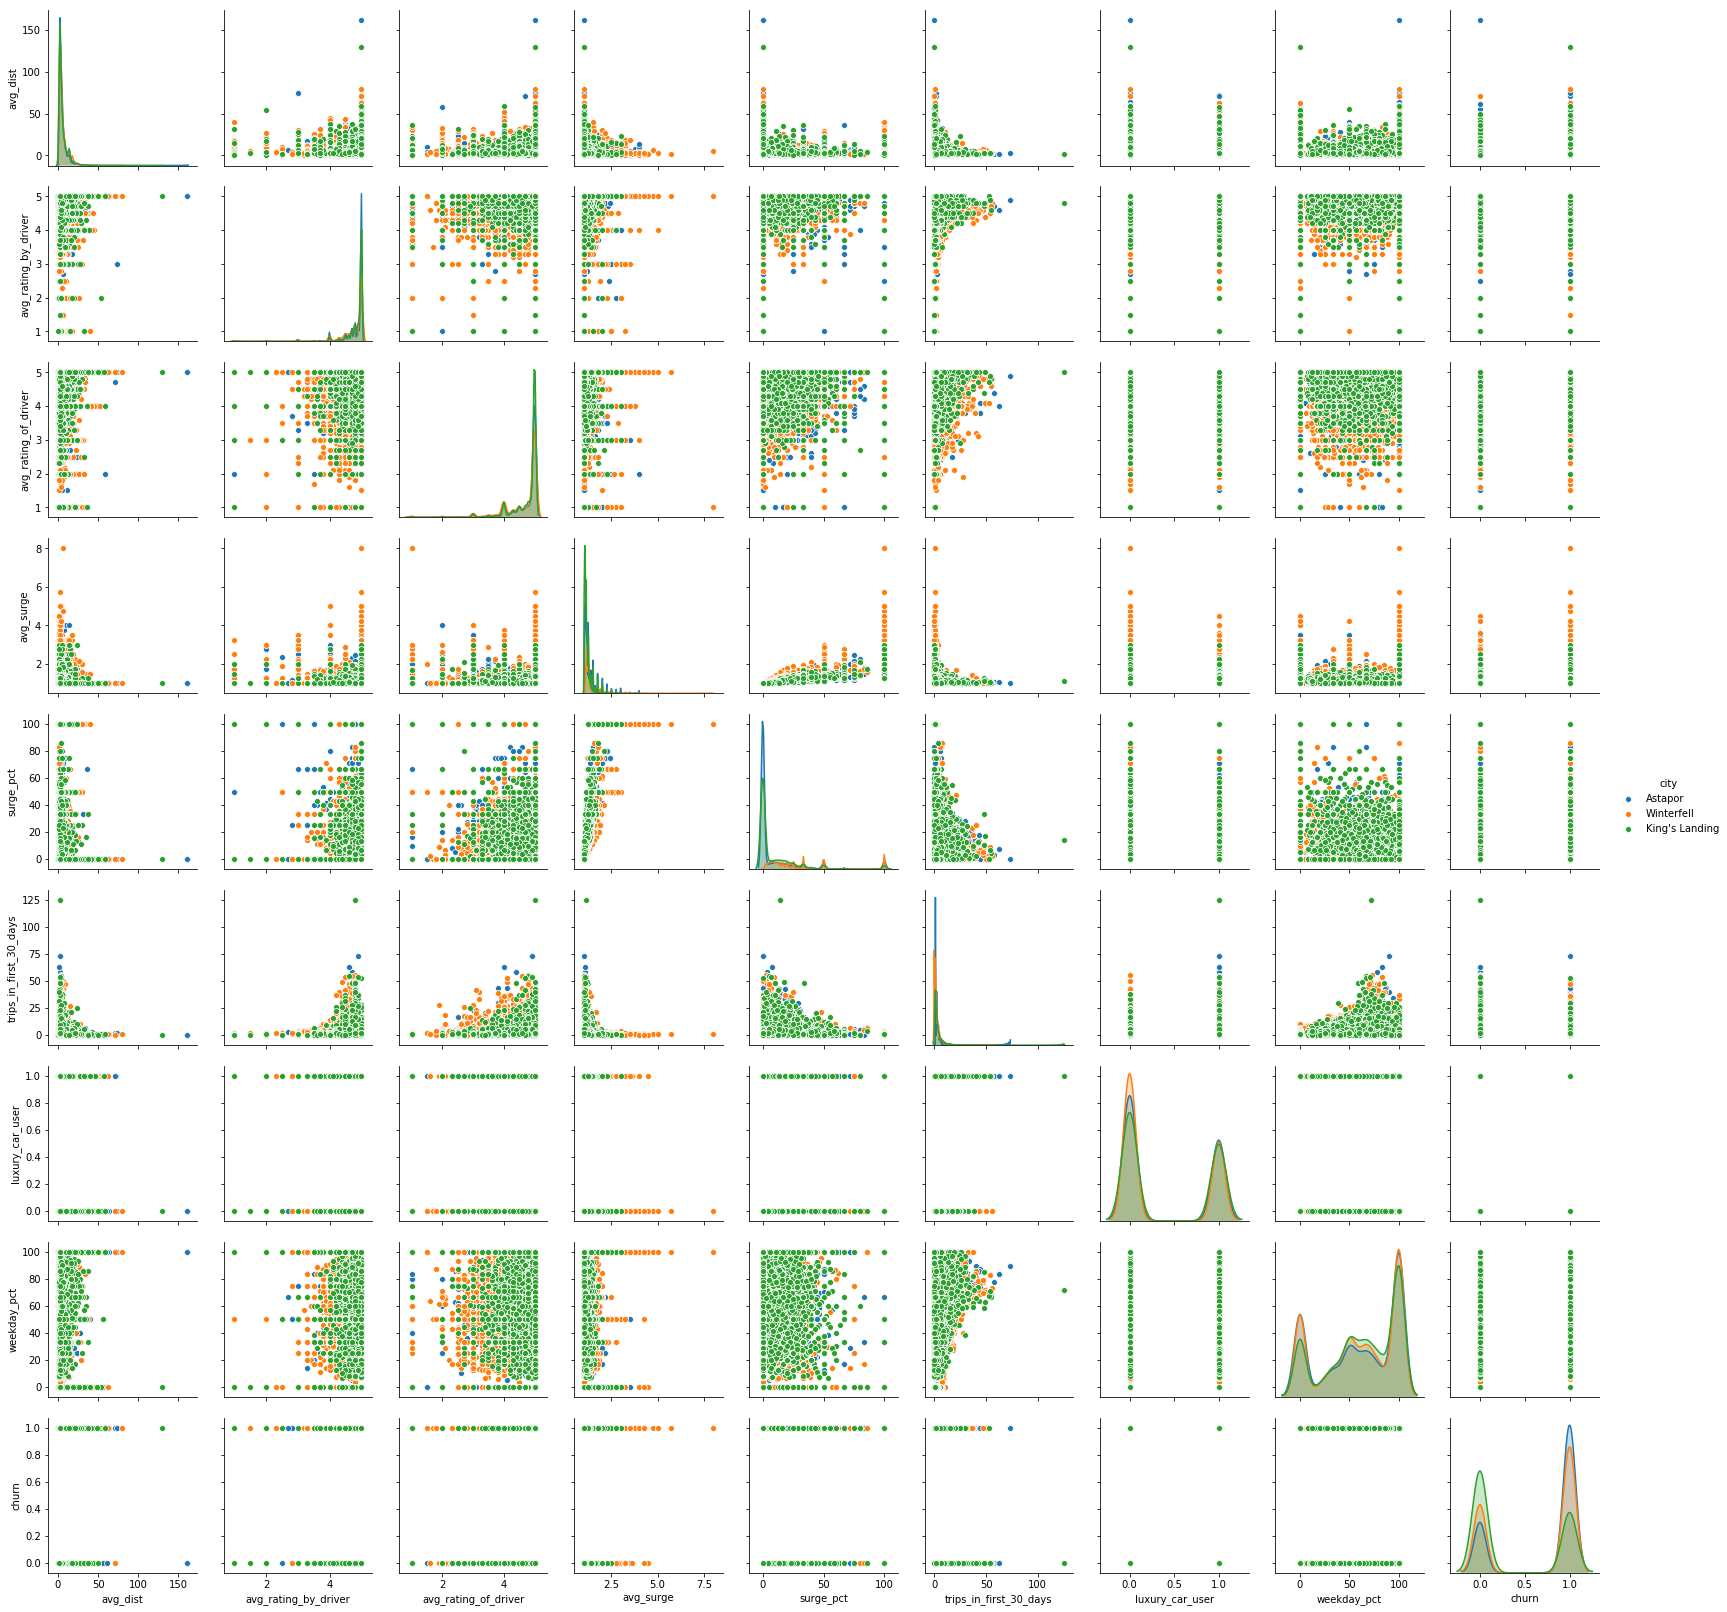

In [68]:
sns.pairplot(data=df, hue="city");

In [ ]:
#One thing becomes visible quite soon and that is the data is heavily either right or left skewed


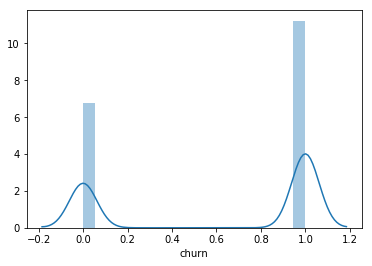

In [56]:
#The values are almost normally distributed except for imbalanced distribution of values
sns.distplot(df['churn']);

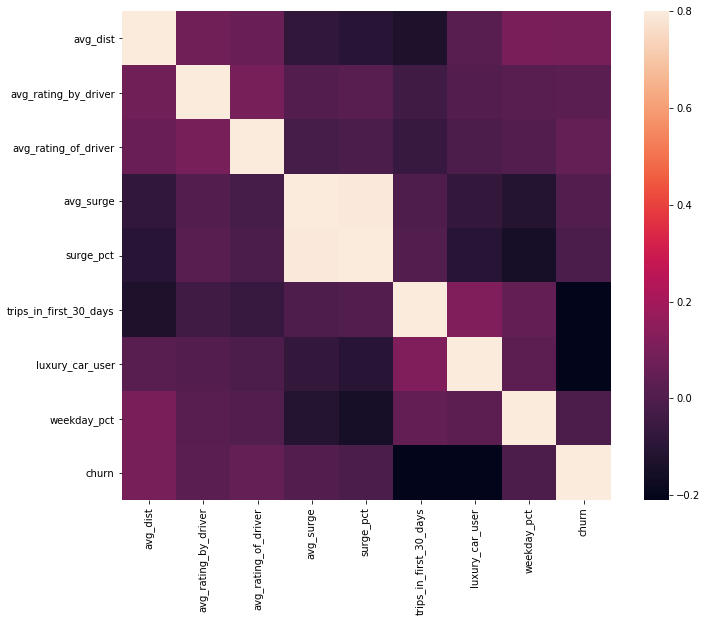

In [69]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct', 'churn'],
      dtype='object')

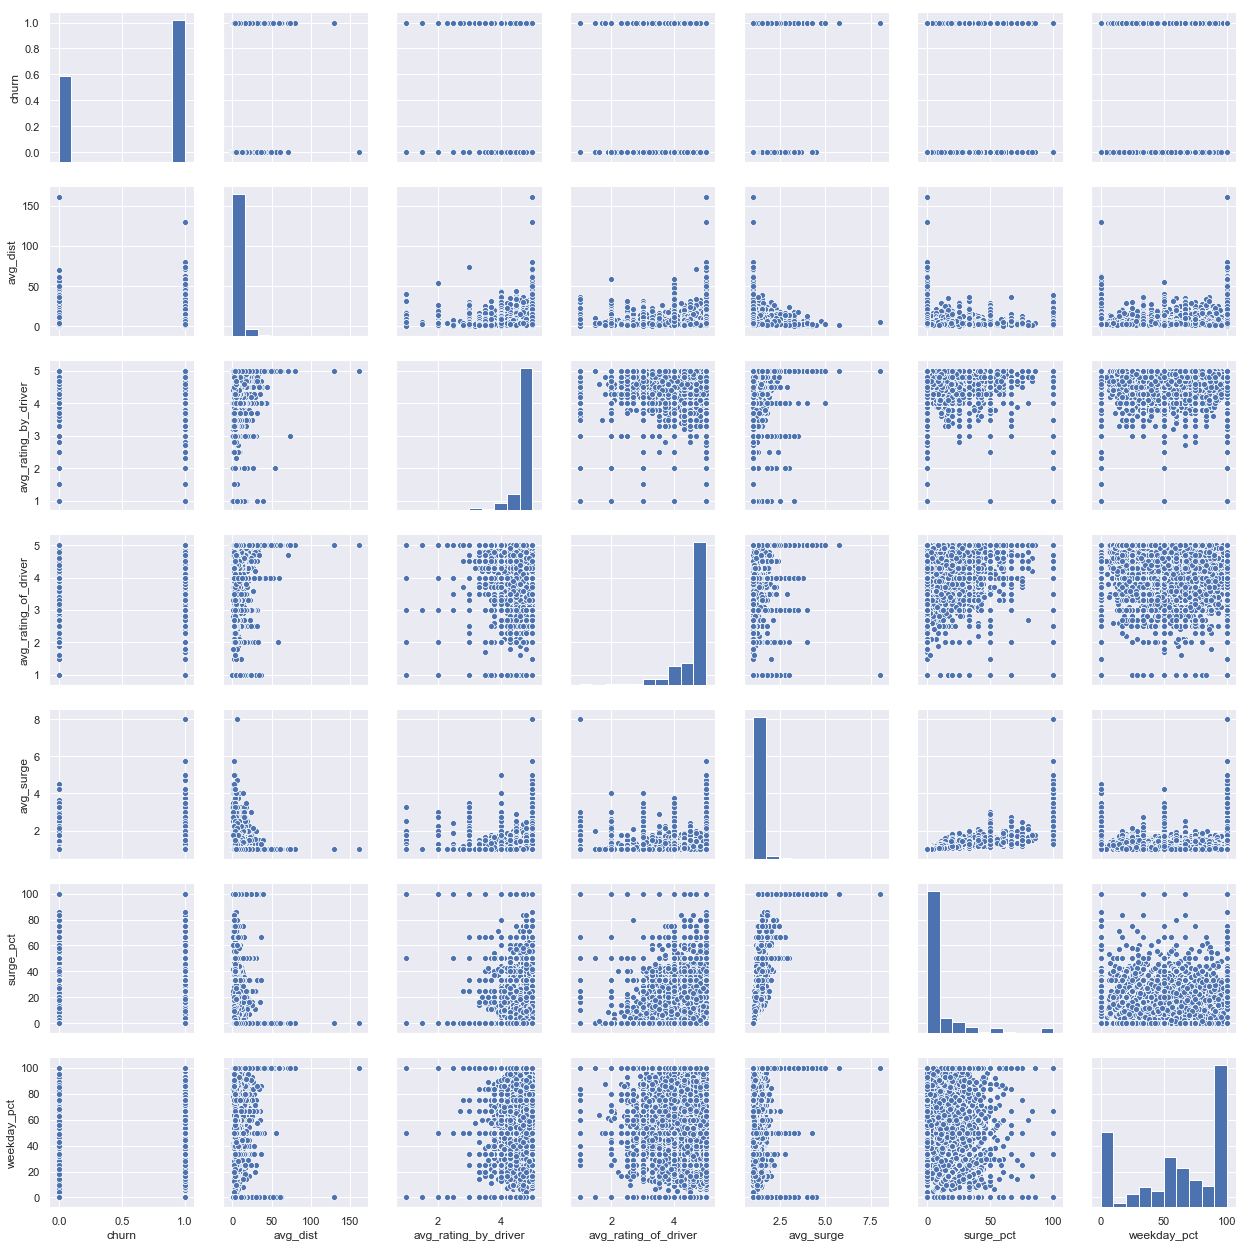

In [71]:
#Plotting the correlated variables
sns.set()
cols = ['churn', 'avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct']
sns.pairplot(df[cols], height = 2.5)
plt.show();


In [ ]:
#We can see both an increasing and a decreasing trend illustrated by linear lines between surge_pct and weekday_pct
#Can also see a shy exponential curve for point in the lower boundary between avg_surge and surge_pct 
#Customers seem to be more tech savy and therefore have provided ratings at the end of their trip than their drivers

In [79]:
#Because 'trips_in_first_30_days' and 'luxury_car_user'are least correlated with churn we shall drop those variables.
#But Going to build baseline with those two variables including.
#It's time to write our function

# def file_read(df):
#     return df

# def labelencoding_categorical_ordinal(x):
#     from sklearn.preprocessing import LabelEncoder
#     for c in x:
#         lbe = LabelEncoder() 
#         lbe.fit(list(df[c].values)) 
#         df[c] = lbe.transform(list(df[c].values))
        
# def main_fn():
#     labelencoding_categorical_ordinal(['last_trip_date', 'signup_date'])
#     cols = [col for col in df.columns if col in ['avg_dist','avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct','trips_in_first_30_days','luxury_car_user','weekday_pct','churn']]
#     df1 = df[cols]                                             
#     return df1

# df_train=main_fn()


In [97]:
def labelencoding_categorical_ordinal(x):
    from sklearn.preprocessing import LabelEncoder
    for c in x:
        lbe = LabelEncoder() 
        lbe.fit(list(df[c].values)) 
        df[c] = lbe.transform(list(df[c].values))
labelencoding_categorical_ordinal(['last_trip_date', 'signup_date'])

In [99]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn
0,6.94,5.0,5.0,1.00,Astapor,122,Android,11,0.0,0,False,100.0,1
1,8.06,5.0,5.0,1.00,Astapor,25,Android,24,0.0,2,True,0.0,1
2,21.50,4.0,5.0,1.00,Winterfell,140,iPhone,1,0.0,1,True,100.0,1
3,9.46,5.0,5.0,2.75,Winterfell,9,Android,8,100.0,1,False,100.0,1
4,13.77,5.0,5.0,1.00,Winterfell,132,iPhone,30,0.0,0,False,100.0,1


In [101]:
#Converting the boolean values into 1 and 0

df['luxury_car_user'] = df['luxury_car_user'].apply(lambda x: 0 if x=='False' else 1)

In [104]:
#Not sure whether it matters to transform the skewed features while building classifiers. For now proceeding without correcting for
#the skewness. Also we shouldn't include the target variable: churn while calculating skewness

from scipy.stats import norm, skew
numeric_feats = df.dtypes[df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skewed_features' :skewed_feats})
skewness


Skew in numerical features: 



,Skewed_features
avg_surge,6.893955
trips_in_first_30_days,5.310990
avg_dist,3.561359
surge_pct,3.145642
luxury_car_user,0.000000
signup_date,-0.090630
last_trip_date,-0.375612
weekday_pct,-0.474507
churn,-0.512875
avg_rating_of_driver,-2.665946


In [105]:
df = pd.get_dummies(df)

In [106]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,6.94,5.0,5.0,1.00,122,11,0.0,0,1,100.0,1,1,0,0,1,0
1,8.06,5.0,5.0,1.00,25,24,0.0,2,1,0.0,1,1,0,0,1,0
2,21.50,4.0,5.0,1.00,140,1,0.0,1,1,100.0,1,0,0,1,0,1
3,9.46,5.0,5.0,2.75,9,8,100.0,1,1,100.0,1,0,0,1,1,0
4,13.77,5.0,5.0,1.00,132,30,0.0,0,1,100.0,1,0,0,1,0,1


In [110]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,6.94,5.0,5.0,1.00,122,11,0.0,0,1,100.0,1,0,0,1,0
1,8.06,5.0,5.0,1.00,25,24,0.0,2,1,0.0,1,0,0,1,0
2,21.50,4.0,5.0,1.00,140,1,0.0,1,1,100.0,0,0,1,0,1
3,9.46,5.0,5.0,2.75,9,8,100.0,1,1,100.0,0,0,1,1,0
4,13.77,5.0,5.0,1.00,132,30,0.0,0,1,100.0,0,0,1,0,1


In [111]:
df['churn']=pd.Series(y)

In [113]:
from sklearn.externals import joblib
joblib.dump(df,'churn_train_dataset')

['churn_train_dataset']

In [108]:
y=df['churn'].values
df.drop('churn', inplace=True, axis=1)
X=df.values

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)

In [147]:

#Validation function

def classifier_performance(model):
    from sklearn.model_selection import KFold, cross_val_score
    kf = KFold(10, shuffle=True, random_state=42)
#     roc_score=roc_auc_score(y_true, y_scores)
    log_loss_val=cross_val_score(model, X_train, y_train, cv=10, scoring='neg_log_loss')
    return(log_loss_val.mean(), model)

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
# gnb=make_pipeline((StandardScaler(), GaussianNB(priors=None))
# (StandardScaler(), KNeighborsClassifier()))

def make_pipeline(m):
    from sklearn.pipeline import make_pipeline
    res=[]
    for i in m:
        res.append(make_pipeline(StandardScaler(), i))
    return res
# make_pipeline(m=[GaussianNB(), RandomForestClassifier()])    

In [149]:
#GaussianNB(), RandomForestClassifier(), AdaBoostClassifier(), LogisticRegression()
for m in make_pipeline(m=[GaussianNB(), RandomForestClassifier(), AdaBoostClassifier(), LogisticRegression()]):
    print(classifier_performance(m))

(-0.24021862974887967, Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gaussiannb', GaussianNB(priors=None, var_smoothing=1e-09))]))


/Users/chidam/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/chidam/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/chidam/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/chidam/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/chidam/anaconda/lib/python3.5/site-pa

(-0.014292788896347206, Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]))
(-9.992007221626413e-16, Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('adaboostclassifier', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))]))


/Users/chidam/anaconda/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chidam/anaconda/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chidam/anaconda/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chidam/anaconda/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chidam/anaconda/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs

(-0.028352139707395828, Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]))


TypeError: get_params() missing 1 required positional argument: 'self'

In [150]:
#KNeighborsClassifier(), MLPClassifier(), DecisionTreeClassifier()
for m1 in make_pipeline(m=[KNeighborsClassifier(), MLPClassifier(), DecisionTreeClassifier()]):
    print(classifier_performance(m1))

(-0.461826668093234, Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kneighborsclassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]))
(-0.0088391461405638, Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlpclassifier', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
 ...=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))]))
(-9.992007221626413e-16, Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('decisiontreeclassifier', DecisionTreeClassifier(class_weight=None, criterion=

In [151]:
#SVC
for m_svc in make_pipeline(m=[SVC(probability=True)]):
    print(classifier_performance(m_svc))

/Users/chidam/anaconda/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/chidam/anaconda/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/chidam/anaconda/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/chidam/anaconda/lib/python3.5/site-packages/skle

(-0.032754437542697745, Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]))
